@Author: Bhupinder Singh

@Date: 10-01-2023

@Last Modified by: Bhupinder Singh

@Last Modified date: 12-01-2023

@Title: Build a predictive linear regression model for given dataset, given temperature,
        humidity, wind speed , wind bearing, visibility, pressure predict apparent
        temperature

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from csv import reader
import seaborn as sns
import math
import operator
from scipy import stats

### Import the dataset 

In [2]:
data = pd.read_csv('weatherHistory.csv')

### Getting Insights of dataset

In [3]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent_Temperature_C,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [4]:
data.describe()

,Temperature (C),Apparent_Temperature_C,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Formatted Date          96453 non-null  object 
 1   Summary                 96453 non-null  object 
 2   Precip Type             95936 non-null  object 
 3   Temperature (C)         96453 non-null  float64
 4   Apparent_Temperature_C  96453 non-null  float64
 5   Humidity                96453 non-null  float64
 6   Wind Speed (km/h)       96453 non-null  float64
 7   Wind Bearing (degrees)  96453 non-null  int64  
 8   Visibility (km)         96453 non-null  float64
 9   Loud Cover              96453 non-null  int64  
 10  Pressure (millibars)    96453 non-null  float64
 11  Daily Summary           96453 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 8.8+ MB


### Checking for Null values in data set

In [6]:
data.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type               517
Temperature (C)             0
Apparent_Temperature_C      0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

### Checking for Outliers in data set

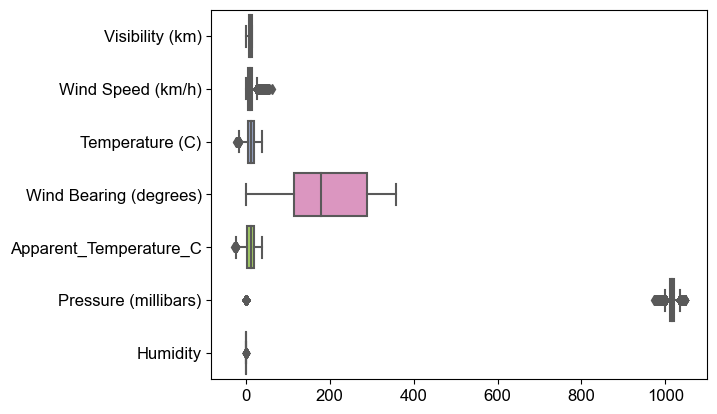

In [7]:
#create the plot
ax = sns.boxplot(data = data[['Visibility (km)','Wind Speed (km/h)', 'Temperature (C)','Wind Bearing (degrees)','Apparent_Temperature_C','Pressure (millibars)','Humidity',]], orient = "h", palette = "Set2")
ax.tick_params(which = "both", labelsize = 12)
sns.set(rc={'figure.figsize':(15,10)})

### Removing Outliers

In [9]:
def cap_data(data):
    for col in data.columns:
        print("capping the ",col)
        if (((data[col].dtype)=='float64') | ((data[col].dtype)=='int64')):
            percentiles = data[col].quantile([0.5,0.95]).values
            data[col][data[col] <= percentiles[0]] = percentiles[0]
            data[col][data[col] >= percentiles[1]] = percentiles[1]
        else:
            data[col]=data[col]
    return data

data=cap_data(data)

capping the  Formatted Date
capping the  Summary
capping the  Precip Type
capping the  Temperature (C)
capping the  Apparent_Temperature_C
capping the  Humidity
capping the  Wind Speed (km/h)
capping the  Wind Bearing (degrees)
capping the  Visibility (km)
capping the  Loud Cover
capping the  Pressure (millibars)
capping the  Daily Summary


C:\Users\Asus\AppData\Local\Temp\ipykernel_33436\1505178214.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][data[col] <= percentiles[0]] = percentiles[0]
C:\Users\Asus\AppData\Local\Temp\ipykernel_33436\1505178214.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][data[col] >= percentiles[1]] = percentiles[1]


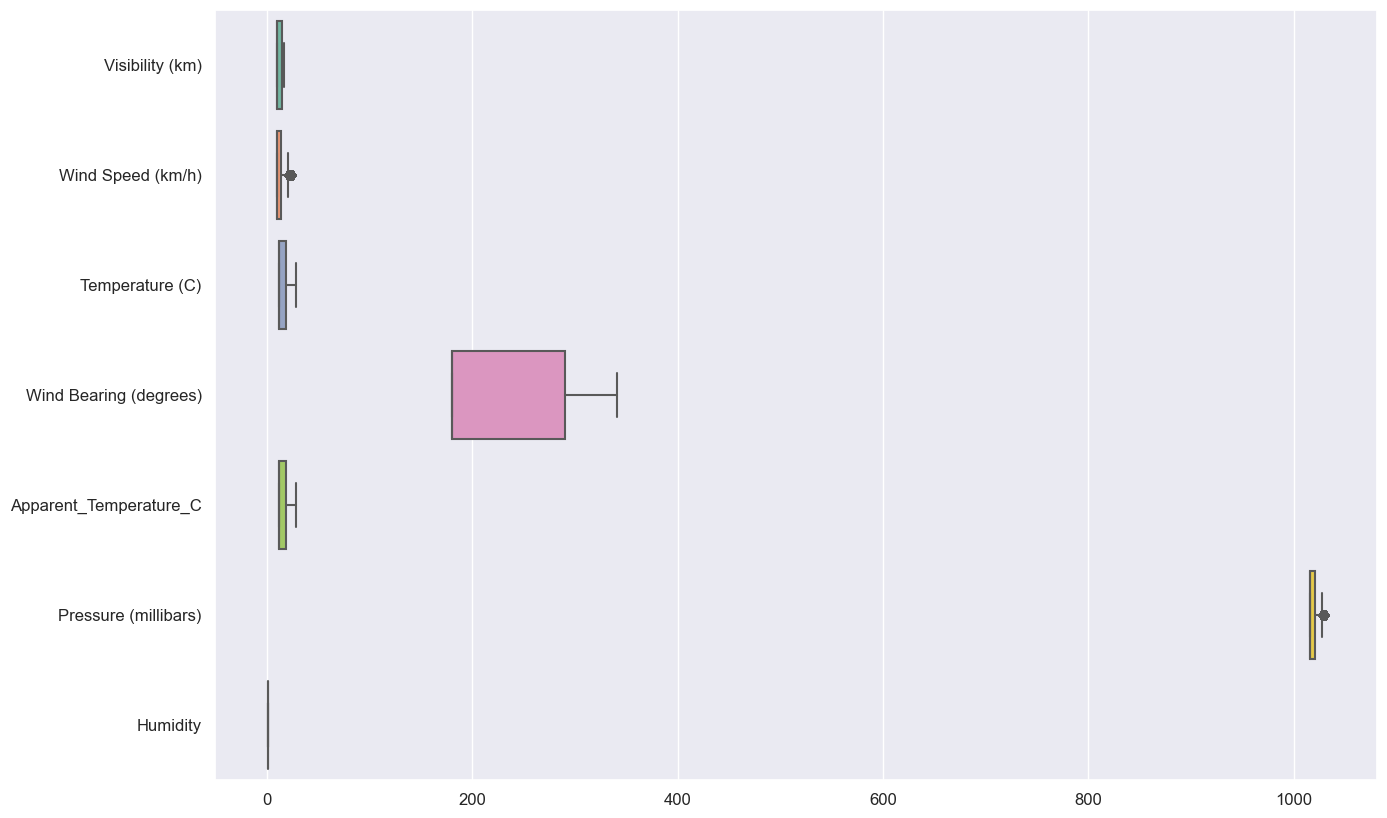

In [11]:
#create the plot
ax = sns.boxplot(data = data[['Visibility (km)','Wind Speed (km/h)', 'Temperature (C)','Wind Bearing (degrees)','Apparent_Temperature_C','Pressure (millibars)','Humidity',]], orient = "h", palette = "Set2")
ax.tick_params(which = "both", labelsize = 12)
sns.set(rc={'figure.figsize':(15,10)})

### Feature Scaling

In [13]:
for col in data.columns:
        print("Scaling the ",col)
        if (((data[col].dtype)=='float64') | ((data[col].dtype)=='int64')):
         data[col] = (data[col] - data[col].mean())/data[col].std()
print("Train Data")
data.head(5)

Scaling the  Formatted Date
Scaling the  Summary
Scaling the  Precip Type
Scaling the  Temperature (C)
Scaling the  Apparent_Temperature_C
Scaling the  Humidity
Scaling the  Wind Speed (km/h)
Scaling the  Wind Bearing (degrees)
Scaling the  Visibility (km)
Scaling the  Loud Cover
Scaling the  Pressure (millibars)
Scaling the  Daily Summary
Train Data


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent_Temperature_C,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,-0.731308,-0.7305,0.800571,0.316768,0.363788,1.709607,NaN,-0.687461,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,-0.731308,-0.7305,0.360168,0.350524,0.495623,1.709607,NaN,-0.687461,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,-0.731308,-0.7305,0.800571,-0.650914,-0.410740,1.344554,NaN,-0.687461,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,-0.731308,-0.7305,-0.080235,0.313017,0.660416,1.709607,NaN,-0.687461,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,-0.731308,-0.7305,-0.080235,-0.399617,0.495623,1.709607,NaN,-0.673131,Partly cloudy throughout the day.


In [15]:
data.drop(['Formatted Date','Summary','Precip Type','Loud Cover','Daily Summary'],axis=1,inplace=True)

In [16]:
data=data.iloc[:,[0,2,3,4,5,6,1]]

###  Split the dataset into training set and test set

In [17]:
# Select ratio
ratio = 0.80
  
total_rows = data.shape[0]
train_size = int(total_rows*ratio)
  
# Split data into test and train
train_data = data[0:train_size]
test_data = data[train_size:]


# print train set
print("Train dataframe")
display(train_data)
  
# print test set
print("Test dataframe")
display(test_data)

train_data.shape, test_data.shape

Train dataframe


,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Apparent_Temperature_C
0,-0.731308,0.800571,0.316768,0.363788,1.709607,-0.687461,-0.7305
1,-0.731308,0.360168,0.350524,0.495623,1.709607,-0.687461,-0.7305
2,-0.731308,0.800571,-0.650914,-0.410740,1.344554,-0.687461,-0.7305
3,-0.731308,-0.080235,0.313017,0.660416,1.709607,-0.687461,-0.7305
4,-0.731308,-0.080235,-0.399617,0.495623,1.709607,-0.673131,-0.7305
...,...,...,...,...,...,...,...
77157,-0.731308,1.387775,-0.650914,-0.806243,-0.717322,1.887121,-0.7305
77158,-0.731308,1.387775,-0.650914,-0.806243,-0.717322,1.817860,-0.7305
77159,-0.731308,1.240974,-0.650914,1.813968,-0.717322,1.743823,-0.7305
77160,-0.731308,1.387775,-0.650914,-0.806243,-0.717322,1.741435,-0.7305


Test dataframe


,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Apparent_Temperature_C
77162,-0.731308,1.387775,-0.650914,0.841689,-0.717322,1.688892,-0.730500
77163,-0.731308,1.974979,-0.650914,-0.806243,-0.717322,1.703222,-0.730500
77164,-0.731308,1.974979,-0.650914,-0.806243,-0.717322,1.712775,-0.730500
77165,-0.731308,1.974979,-0.650914,-0.806243,-0.717322,1.715164,-0.730500
77166,-0.731308,1.534576,-0.650914,-0.806243,-0.717322,1.739047,-0.730500
...,...,...,...,...,...,...,...
96448,1.990743,-0.814240,-0.410869,-0.806243,1.824532,-0.687461,1.984682
96449,1.712388,-0.814240,-0.620909,-0.806243,1.594683,-0.687461,1.707030
96450,1.218255,-0.814240,-0.650914,-0.806243,1.824532,-0.687461,1.214143
96451,1.117917,-0.814240,-0.519640,-0.806243,1.824532,-0.687461,1.114059


((77162, 7), (19291, 7))

### Extracting the values of features

In [18]:
data_n=train_data.values
m2=len(data_n[:,-1])
x_train=data_n[:,0:6].reshape(m2,6)
x_train = np.append(np.ones((m2,1)),x_train,axis=1)
y_train=data_n[:,-1].reshape(m2,1)
theta=np.zeros((7,1))

In [19]:
print(x_train.shape)
print(y_train.shape)

(77162, 7)
(77162, 1)


In [20]:
def computeCost(x_train,y_train,theta):
    """
    Description:
            generate the cost function of using theta as parameter in a linear regression model
    Parameter:
        x_train: x values from train dataset
        y_train: y values from train dataset
        theta: theta values from gradient descent function
    Return:
            Returns computed cost
    """
    square_err=(x_train.dot(theta) - y_train)**2
    
    return 1/(2*len(x_train)) * np.sum(square_err)

In [21]:
computeCost(x_train,y_train,theta)

0.5019801858087101

In [22]:
def gradientDescent(x_train,y_train,theta,alpha,num_iters):
    """
    Description:
            update theta by taking   num_iters gradient steps with learning rate of alpha
    Parameter:
        X: x values from train dataset
        y: y values from train dataset
        theta: initial theta values 
        alpha: learning rate
        num_iters: Number of epochs
    Return:
            Returns the computed theta and cost function value
    """
    J_history=[]
    
    for i in range(num_iters):
        theta-=alpha * 1/len(x_train) * np.dot(x_train.transpose(),(x_train.dot(theta) -y_train))
        cost= computeCost(x_train,y_train,theta)
        J_history.append(cost)
        print(f"For Epoch {i} Theta :{theta} Cost = {cost}")
    return theta,J_history,cost

In [23]:
alpha= 0.01
epochs= 500
theta,J_history,cost= gradientDescent(x_train,y_train,theta,alpha,epochs)
print(f"Final theta values : {theta} with cost = {cost}")
print(f"h(x) = {str(round(theta[0,0],2))} + {str(round(theta[1,0],2))} x1 + {str(round(theta[2,0],2))}x2 +{str(round(theta[3,0],2))} x3 + {str(round(theta[4,0],2))}x4 +{str(round(theta[5,0],2))} x5 + {str(round(theta[6,0],2))}x6")

For Epoch 0 Theta :[[ 5.53507374e-06]
 [ 1.00418421e-02]
 [-4.24179926e-03]
 [-3.63735701e-04]
 [ 5.62631090e-05]
 [-6.24360170e-05]
 [-3.06254145e-03]] Cost = 0.48923768822181335
For Epoch 1 Theta :[[ 9.51794139e-06]
 [ 1.99552706e-02]
 [-8.39738394e-03]
 [-7.34578283e-04]
 [ 1.10466034e-04]
 [-1.33625253e-04]
 [-6.06047462e-03]] Cost = 0.47685958110825977
For Epoch 2 Theta :[[ 1.19876100e-05]
 [ 2.97421366e-02]
 [-1.24682360e-02]
 [-1.11220477e-03]
 [ 1.62674327e-04]
 [-2.13298431e-04]
 [-8.99493823e-03]] Cost = 0.4648348362679991
For Epoch 3 Theta :[[ 1.29823650e-05]
 [ 3.94042628e-02]
 [-1.64558127e-02]
 [-1.49629996e-03]
 [ 2.12951881e-04]
 [-3.01191958e-04]
 [-1.18670518e-02]] Cost = 0.45315276938244464
For Epoch 4 Theta :[[ 1.25397826e-05]
 [ 4.89434443e-02]
 [-2.03615473e-02]
 [-1.88655632e-03]
 [ 2.61360961e-04]
 [-3.97047815e-04]
 [-1.46779160e-02]] Cost = 0.4418030291034294
For Epoch 5 Theta :[[ 1.06967410e-05]
 [ 5.83614486e-02]
 [-2.41868489e-02]
 [-2.28267374e-03]
 [ 3.07

Text(0.5, 1.0, 'Cost function using Gradient Descent')

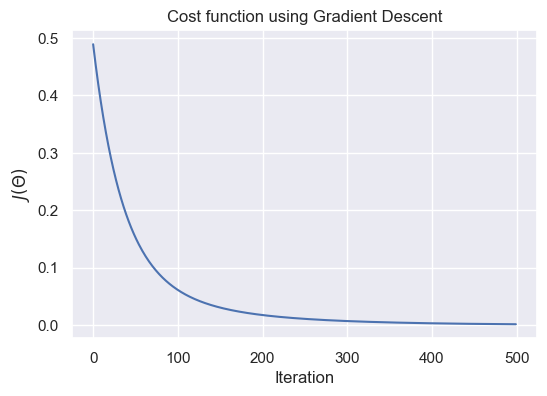

In [45]:
f = plt.figure()
f.set_figwidth(6)
f.set_figheight(4)
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

### Implementing Performances Metrices

In [25]:
data_x=test_data.values
m2=len(data_x[:,-1])
x_test=data_x[:,0:6].reshape(m2,6)
x_test = np.append(np.ones((m2,1)),x_test,axis=1)
y_test=data_x[:,-1].reshape(m2,1)

In [26]:
y_pred = np.dot(x_test, theta)
print(y_test)
print(y_pred)

[[-0.73049972]
 [-0.73049972]
 [-0.73049972]
 ...
 [ 1.21414316]
 [ 1.11405916]
 [ 0.90420561]]
[[-0.77966152]
 [-0.81311677]
 [-0.81340463]
 ...
 [ 1.18617772]
 [ 1.08759413]
 [ 0.89703791]]


### calculating R-squared value for measuring goodness of our model. 

In [27]:
# calculating R-squared value for measuring goodness of our model. 
mean_y = np.mean(y_test)
ss_t = 0 #total sum of squares
ss_r = 0 #total sum of square of residuals
for i in range(len(y_test)): # val_count represents the no.of input x values
  
  ss_t += (y_test[i] - mean_y) ** 2
  ss_r += (y_test[i] - y_pred[i]) ** 2
r2 = 1 - (ss_r/ss_t)

print(r2)

[0.99603074]


### Calculating Mean Square Error

In [32]:
summation = 0  #variable to store the summation of differences
n = len(x_test) #finding total number of items in list
for i in range (0,n):  #looping through each element of the list
  difference = y_test[i] - y_pred[i]  #finding the difference between observed and predicted value
  squared_difference = difference**2  #taking square of the differene 
  summation = summation + squared_difference  #taking a sum of all the differences
MSE = summation/n  #dividing summation by total values to obtain average
print ("The Mean Square Error is: " , MSE)

The Mean Square Error is:  [0.00390615]


### Calculating Mean Absolute Error 

In [31]:
# Calculating Mean Absolute Error  
n = len(x_test)
sum = 0  
# for loop for iteration
for i in range(n):
    sum += abs(y_test[i] - y_pred[i])
  
error = sum/n
  
# display
print("Mean absolute error : " + str(error))

Mean absolute error : [0.0492013]


### Calculating Root Mean Square Error

In [30]:
n = len(x_test)
sum=0
for i in range(n):
    squared_diff = (y_test[i]-y_pred[i])**2
    sum+= squared_diff
error = sum/n
error=error**0.5 

print("Root Mean Square Error:\n")
print(error)

Root Mean Square Error:

[0.06249923]


### calculating Adjusted R-squared value for measuring goodness of our model. 

In [33]:
#calculate r-squared
N=len(x_test)
p=6
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  [0.99602951]
